# Imports #

کتابخانه های مورد نیاز در این پروژه همه در این قسمت اضافه و ایمپورت شده

In [183]:
import matplotlib.pyplot as plt
from persiantools.jdatetime import JalaliDateTime
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import re

# تحلیل و بررسی دیتای کامنت ها #

 ## تبدیل فایل اکسل کامنت ها به سی اس وی برای بهتر نمایش دادن داده ها ##

In [6]:
df = pd.read_excel("comment.xlsx")
df.to_csv("comment.csv", index=False)

## بارگذاری داده ها و نمایش مشخصات داده ##

دراین قسمت اطلاعات مربوط به داده مان را در هر بخش آن خواهیم داشت

In [98]:
comment_data = pd.read_csv("comment.csv")
comment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100008 entries, 0 to 100007
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_id    100008 non-null  int64 
 1   confirmed_at  100008 non-null  object
 2   comment       99903 non-null   object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


## نمایش پنج ردیف اول داده ها ##

In [11]:
comment_data.head()

,product_id,confirmed_at,comment
0,90213,2018-08-23 11:05:47,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...


## نمایش پنج ردیف آخر داده ها ##

با این کار هم میتوانیم ۵ داده از آخر را ببینیم و حتی مطلع شویم که داده های ماچند سطر هستند

In [14]:
comment_data.tail()

,product_id,confirmed_at,comment
100003,104998,2018-07-09 21:27:12,قیمت مناسبی داره در حال حاضر . با این پول سخت ...
100004,333389,2018-07-09 21:26:52,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...
100005,356546,2018-07-09 21:26:30,من این محصول رو از بیرون تهیه کردم . و باید بگ...
100006,33874,2018-07-09 21:26:12,دوسال و.نیم پیش از دیجی کالا گرفتم. هنوز مثل ر...
100007,318278,2018-07-09 21:26:02,با استفاده از این شامپو مشکل خشکی مو و پوست سر...


## پیش پردازش داده ها ##

دراین قسمت اعلان ها و کاراکترهای غیر ضروری رو در کامنت ها رو حذف میکنیم

In [17]:
def preprocess_text(text_value):
    if pd.isna(text_value):
        return ''
    text = re.sub(r'[^آ-ی\s]', '', text_value)
    return text

comment_data["comment"] = comment_data["comment"].apply(preprocess_text)


comment_data[["comment"]].head()

,comment
0,سلام قبل اینکه نظرم رو بگم میخواستم به یک موضو...
1,بوی تند ولی خوشبو دارهماندگاریش خوبه و هر چقدر...
2,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,این تیغ محصول کشور آمریکا هست در عکس محصول مش...


## persiantools نصب کتابخونه ##

این کتابخونه برای تبدیل تاریخ و زمان میلادی به شمسی می باشد

In [20]:
!pip install persiantools

## تبدیل تاریخ ##

دراین قسمت تاریخ میلادی رو به شمسی تبدیل کردیمو در یک ستون جدید قرار دادیم همچنین نام ستون تاریخ میلادی رو هم تغییر دادیم

In [100]:
from persiantools.jdatetime import JalaliDateTime
comment_data['confirmed_at'] = pd.to_datetime(comment_data['confirmed_at'])

comment_data["shamsi_date"] = comment_data["confirmed_at"].apply(lambda x: JalaliDateTime(x).strftime("%Y-%m-%d %H:%M:%S"))
comment_data.rename(columns={"confirmed_at": "miladi_date"}, inplace=True)
comment_data.head()

,product_id,miladi_date,comment,shamsi_date
0,90213,2018-08-23 11:05:47,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,1397-06-01 11:05:47
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...,1397-06-01 10:21:53
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...,1397-07-21 11:13:39
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,1397-07-25 11:27:57
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...,1397-06-01 10:28:47


## تعداد کامنت ها در ماه های موجود ##

در ابتدا یک ستون از ماه ها به دیتای خودمون اضافه کردم و در فایل دیتاهای خود از ماه ۳ تا ۱۰ رو داشتیم که تعداد کامنت ها در هر ماه رو روی نمودار رسم کردم تا از تعداد آن ها در هر ماه با خبر شیم
همچنین تعداد دقیق هر کامنت در هر ماه هم نوشته شده است

تعداد کامنت ها در ماه 3 = 4370
تعداد کامنت ها در ماه 4 = 33350
تعداد کامنت ها در ماه 5 = 26579
تعداد کامنت ها در ماه 6 = 26906
تعداد کامنت ها در ماه 7 = 7380
تعداد کامنت ها در ماه 8 = 319
تعداد کامنت ها در ماه 9 = 856
تعداد کامنت ها در ماه 10 = 248


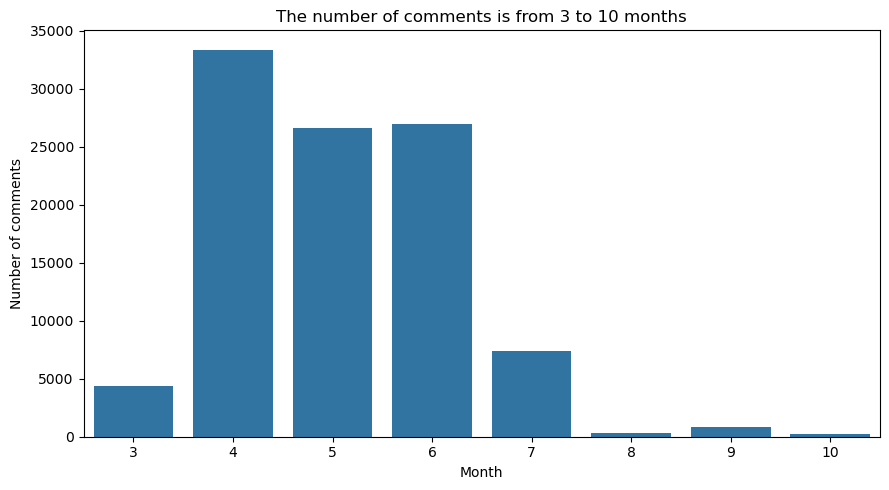

In [26]:
comment_data['miladi_date'] = pd.to_datetime(comment_data['miladi_date'])

comment_data['month'] = comment_data['miladi_date'].dt.month


monthly_counts = comment_data['month'].value_counts().sort_index()
i = 3
for x in monthly_counts:
    print(f"تعداد کامنت ها در ماه {i} = {x}")
    i+=1

plt.figure(figsize=(9, 5))
sns.countplot(x='month', data=comment_data)
plt.title("The number of comments is from 3 to 10 months")
plt.xlabel("Month")
plt.ylabel("Number of comments")


plt.tight_layout()
plt.show()


## پنج آیدی محصول که کامنت های بیشتری دارند ##

اکنون پنج تا از آیدی محصولی که تعداد بیشترین کامنت هارو داشته پیدا کردم و روی نمودار نمایش دادم تا در ادامه ی کار بتونیم از اون ها استفاده دیگری هم در نتیجه گیری هامون داشته باشیم

تعداد کامنت های محصول با آیدی(531870) => 579 عدد می باشد
تعداد کامنت های محصول با آیدی(356804) => 532 عدد می باشد
تعداد کامنت های محصول با آیدی(467630) => 374 عدد می باشد
تعداد کامنت های محصول با آیدی(180451) => 297 عدد می باشد
تعداد کامنت های محصول با آیدی(327934) => 228 عدد می باشد


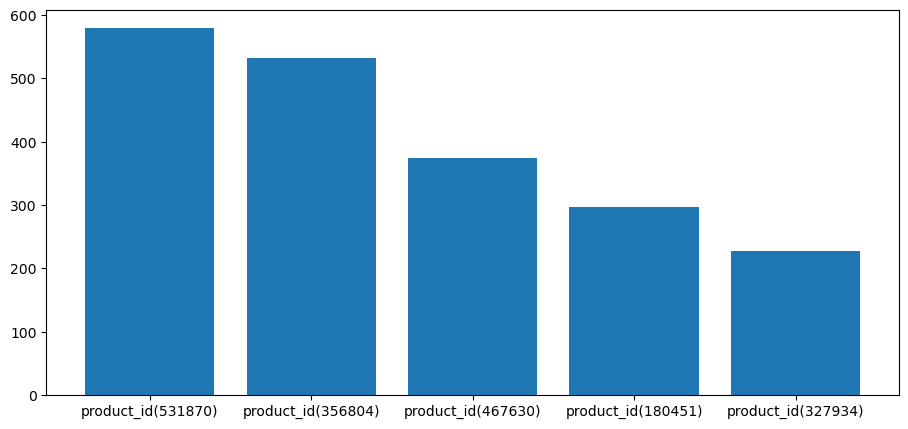

In [29]:
product_count = Counter(comment_data["product_id"])

top_5_products = product_count.most_common(5)

products_id, counts = zip(*top_5_products)

number = 0
for i in range(5):
    print(f"تعداد کامنت های محصول با آیدی({products_id[number]}) => {counts[number]} عدد می باشد")
    number+=1


pro_list = []
for pro in products_id:
    pro_list.append(f"product_id({pro})")


plt.figure(figsize=(11,5))
plt.bar(pro_list, counts)
plt.show()

In [30]:
comment_data

,product_id,miladi_date,comment,shamsi_date,month
0,90213,2018-08-23 11:05:47,سلام قبل اینکه نظرم رو بگم میخواستم به یک موضو...,1397-06-01 11:05:47,8
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو دارهماندگاریش خوبه و هر چقدر...,1397-06-01 10:21:53,8
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...,1397-07-21 11:13:39,10
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,1397-07-25 11:27:57,10
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست در عکس محصول مش...,1397-06-01 10:28:47,8
...,...,...,...,...,...
100003,104998,2018-07-09 21:27:12,قیمت مناسبی داره در حال حاضر با این پول سخت م...,1397-04-18 21:27:12,7
100004,333389,2018-07-09 21:26:52,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...,1397-04-18 21:26:52,7
100005,356546,2018-07-09 21:26:30,من این محصول رو از بیرون تهیه کردم و باید بگم...,1397-04-18 21:26:30,7
100006,33874,2018-07-09 21:26:12,دوسال ونیم پیش از دیجی کالا گرفتم هنوز مثل روز...,1397-04-18 21:26:12,7


# تحلیل و بررسی دیتای محصولات #

ابتدا فایل اکسل محصولات رو به سی اس وی تبدیل کردیم 

In [33]:
product_data = pd.read_excel("product.xlsx")
product_data.to_csv("product.csv", index=False)

## باز خوانی فایل محصولات و دریافت مشخصات آن ##

In [36]:
product_data = pd.read_csv("product.csv", low_memory=False)
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   product_title_fa    100000 non-null  object
 2   product_title_en    21165 non-null   object
 3   url_code            99983 non-null   object
 4   title_alt           77432 non-null   object
 5   category_title_fa   100000 non-null  object
 6   category_keywords   99740 non-null   object
 7   brand_name_fa       100000 non-null  object
 8   brand_name_en       100000 non-null  object
 9   product_attributes  3050 non-null    object
dtypes: int64(1), object(9)
memory usage: 7.6+ MB


## دریافت دو ردیف اول محصولات ##

In [38]:
product_data.head()

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه ...",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 می...,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-می...,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره""..."
3,727803,ست لحاف پوپلین هوبی مدل اما یکنفره چهار تکه کاوری,Hobby Emma Quilt Single Set - 4 Pieces,ست-لحاف-پوپلین-هوبی-مدل-اما-یکنفره-چهار-تکه-کاوری,روتختی اسپرت، اما، emma، روتختی یکنفره، لحاف ی...,سرویس خواب,سرویس خواب SleepSet,هوبی,Hobby,"[{""Key"":""ابعاد رو بالشی"",""Value"":""50×70""},{""Ke..."
4,725222,ماگ آبنبات رنگی مدل AR0143,NaN,ماگ-آبنبات-رنگی-مدل-ar0143,ماگ آبنبات رنگی،شذدشذشفقشدله،Mag Abnabatrangi,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,متفرقه,Miscellaneous,"[{""Key"":""در"",""Value"":""ندارد""},{""Key"":""جنس"",""Va..."


## دریافت دو ردیف آخر دیتای محصولات ##

In [40]:
product_data.tail(2)

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
99998,799047,سینی برایتون مدل BT-8387,NaN,سینی-برایتون-مدل-bt-8387,سینی، سینی چای، sdkd ]hd,سینی,سینی Tray,برایتون,briton,NaN
99999,782276,تیشرت زنانه تارپون طرح فانتزی کد 10532,NaN,تیشرت-زنانه-تارپون-طرح-فانتزی-کد-10532,تیشرت، تیشرت آستین کوتاه، تیشرت تارپون، تیشرت ...,تی‌شرت و پولوشرت زنانه,تی‌شرت و پولوشرت زنانه womens-tshirts-polos,تارپون,tarpon,NaN


## پنج دسته بندی پرفروش ##

دریافت و نمایش پنج دسته بندی پرمحصول که بیشتر در دیتاهای ما دیده میشود

تعداد محصولات از دسته بندی (کیف و کاور گوشی ) ==> 4384 عدد می باشد
تعداد محصولات از دسته بندی (تیشرت و پولوشرت مردانه ) ==> 4038 عدد می باشد
تعداد محصولات از دسته بندی (محافظ صفحه نمایش گوشی ) ==> 1962 عدد می باشد
تعداد محصولات از دسته بندی (ساعت مچی عقربهای  ) ==> 1932 عدد می باشد
تعداد محصولات از دسته بندی (کتاب چاپی ) ==> 1912 عدد می باشد


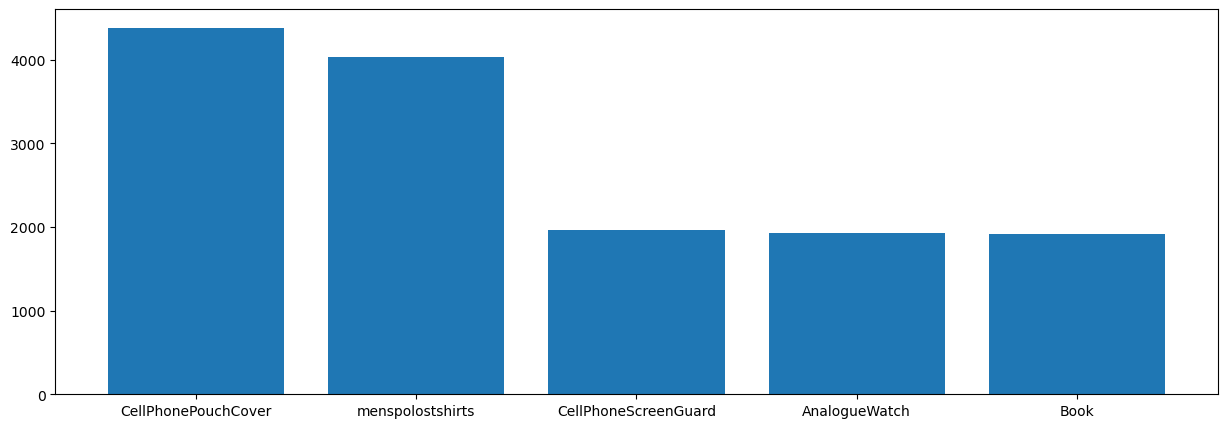

In [43]:
id_count = Counter(product_data["category_keywords"])
top_5_id = id_count.most_common(5)

top_list = []
top_list_en = []
for x in top_5_id:
    y = re.sub(r'[^آ-ی\s]', '', x[0])
    z = re.sub(r'[^a-zA-Z\s]', '', x[0])
    top_list.append((y, x[1])) 
    top_list_en.append((z, x[1])) 
    
category, count = zip(*top_list)

categories = [re.sub(r"A-Za-z","",item[0].strip()) for item in top_list_en]

i = 0
for c in category:
    print(f"تعداد محصولات از دسته بندی ({c}) ==> {count[i]} عدد می باشد")
    i+=1
    
plt.figure(figsize=(15,5))
plt.bar(categories, count)

plt.show()


# تحلیل و بررسی دیتای سفارشات #

دریافت مشخصات دیتای فایل سفارشات 

In [5]:
orders_data = pd.read_csv("orders.csv")
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


## نمایش دو ردیف اول دیتا ##

دوردیف دیتای سفارشات رو بررسی می کنیم

In [108]:
orders_data.head(2)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0


## نمایش دو ردیف آخر دیتا ##

همچنین نگاهی به دوردیف آخر دیتا میندازیم

In [112]:
orders_data.tail(2)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0
199999,7584127,1342585,89427,2017-06-17 10:08:06.000,55046.0,بندر انزلی,1.0


## پیش پردازش داده ها ##

اصلاح نوع داده ی ستون زمان سفارش و ستون مقدار

In [7]:
orders_data["DateTime_CartFinalize"] = pd.to_datetime(orders_data["DateTime_CartFinalize"])
print(orders_data["DateTime_CartFinalize"].dtype)

orders_data["Quantity_item"] = orders_data["Quantity_item"].astype(int)
print(orders_data["Quantity_item"].dtype)


datetime64[ns]
int64


## ایجاد ستون ماه  ##

In [ ]:
orders_data["Month"] = orders_data["DateTime_CartFinalize"].dt.month
orders_data[["Month"]]

## تعداد سفارش ها در هر ماه ##

تعداد سفارش ها در هر ماه 
Month
1     14263
2     15588
3     17214
4     15084
5     16268
6     14470
7     16193
8     16726
9     19085
10    17825
11    19139
12    18145
dtype: int64


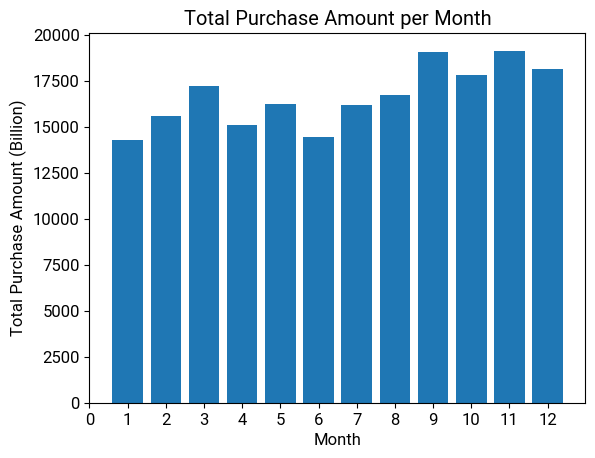

In [91]:
purchase_count = orders_data.groupby("Month").size()

plt.bar(purchase_count.index, purchase_count)
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount (Billion)')
plt.title('Total Purchase Amount per Month')
plt.xticks(range(13))

print(f"تعداد سفارش ها در هر ماه \n{purchase_count}")
plt.show()

## میانگین سفارشات ##

در این قسمت با توجه به کل ماه های موجود در تاریخ های سفارش ها یک میانگین هم بدست اوردیم و اون رو روی نمودار هم نمایش دادیم

*** میانگین سفارشات در کل ماه ها تقریبا 16666 میلیارد می باشد ***


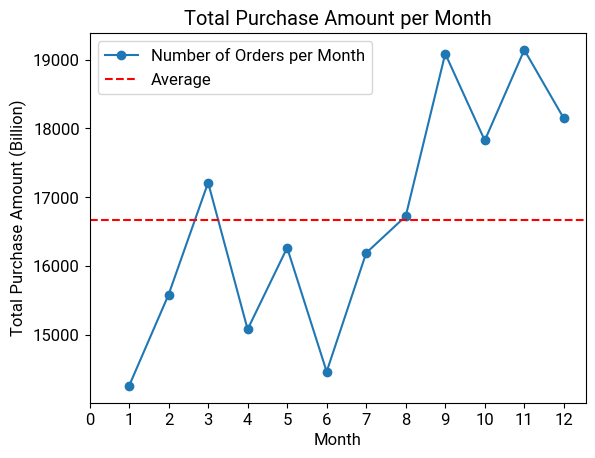

In [175]:
mean_count = purchase_count.mean()

plt.plot(purchase_count, marker="o", label="Number of Orders per Month")
plt.axhline(mean_count, color="red", linestyle="--", label="Average")

plt.xlabel('Month')
plt.ylabel('Total Purchase Amount (Billion)')
plt.title('Total Purchase Amount per Month')
plt.xticks(range(13))
plt.legend()

print(f"*** میانگین سفارشات در کل ماه ها تقریبا {int(mean_count)} میلیارد می باشد ***")
plt.show()

## مجموع مبلغ خرید ها در هر ماه ##

در این بخش میزان مبلغ خریدهای ثبت شده در هر ماه رو بدست اوردیم که در سه ماه اول سال به شکل سعودی مبلغ خرید ها افزایش چشم گیری داشته است و بیشترین خرید ها در ماه سوم بوده است

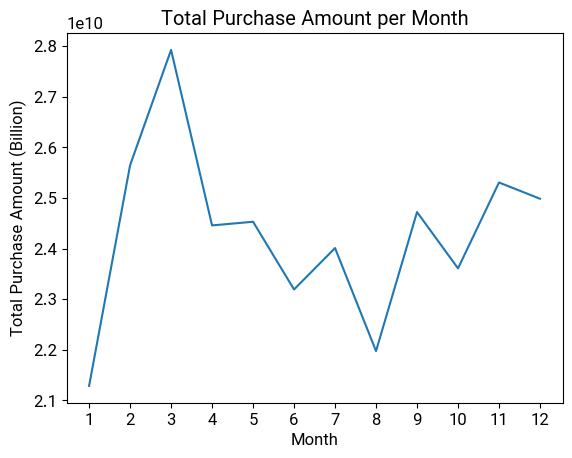

In [219]:
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

monthly_revenue = orders_data.groupby("Month")["Amount_Gross_Order"].sum()    

plt.plot(monthly_revenue.index, monthly_revenue)
plt.xticks(np.arange(1,13), np.arange(1,13))
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount (Billion)')
plt.title('Total Purchase Amount per Month')

plt.show()


## فراوانی سبد خرید های نهایی شده ##

با توجه به نمودار میتوانیم ببینیم که از اواست سال ۲۰۱۷ خرید ها شروع به افزایش کردند و در سال ۲۰۱۸ به اوج رسیدند و تا اواسط این سال هم خرید های بیشتری رو میبینیم. در نهایتمیشه به طور تقریبی گفت کهبیشترین خرید ها شش ماه اول سال ۲۰۱۸ بوده است.

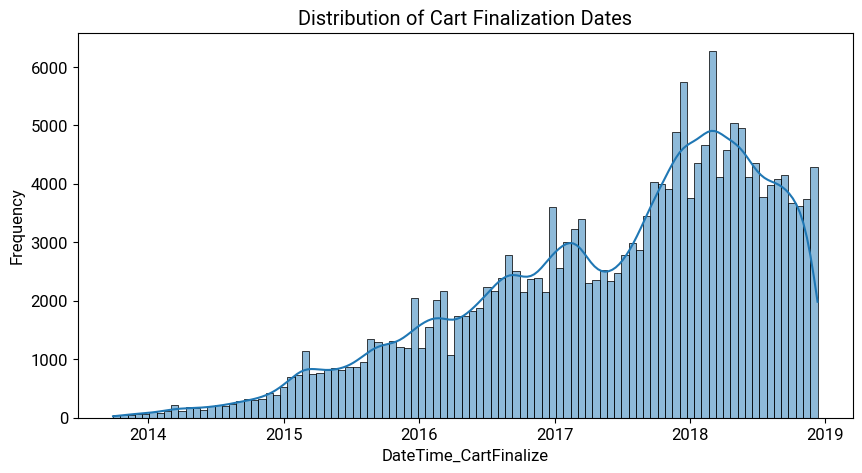

In [173]:
plt.figure(figsize=(10,5))
sns.histplot(orders_data["DateTime_CartFinalize"], kde=True)
plt.show()